**Introduction:**

COVID-19, a global pandemic that has had a significant impact on societies worldwide. COVID-19, caused by the novel coronavirus SARS-CoV-2, has affected millions of people, leading to serious health consequences and straining healthcare systems. The virus primarily spreads from person to person through respiratory droplets when an infected individual coughs, sneezes, or talks. COVID-19 can cause a range of symptoms, including fever, cough, and difficulty breathing. In some cases, it can lead to severe respiratory problems and other complications, especially in older adults and those with underlying health conditions. To prevent the spread of the virus, public health measures like wearing masks, practicing good hand hygiene, and maintaining physical distance from others are important. Vaccines have also been developed and are being administered to provide protection against COVID-19. The impact of COVID-19 has been significant, affecting various aspects of daily life, including travel, work, and social interactions. It has led to temporary closures of businesses, schools, and public spaces in many countries.



### Aim:
- Performing necessary feature engineering steps to clean  and modify the data.
- Identifying important features that may play important role to predict the Corona Virus.
- Predicitng whether a person is affected to Corona virus or not using a machine learning model.

In [ ]:
# import libraries
import numpy as np
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
  #loading the data (.csv file)
  Covid_data = pd.read_csv("corona_tested_006.csv")
  Covid_copy=Covid_data.copy()

<ipython-input-34-45ce9f2132a8>:2: DtypeWarning: Columns (2,3,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  Covid_data = pd.read_csv("corona_tested_006.csv")


In [ ]:
Covid_data.head() # exploring first five rows to identify anamolies in the data

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,TRUE,FALSE,TRUE,FALSE,FALSE,negative,None,None,Abroad
1,2,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
2,3,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
3,4,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Abroad
4,5,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Contact with confirmed


In [ ]:
Covid_data.tail() # exploring last five variaables to identify anamolies in the data

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
278843,278844,30-04-2020,False,False,False,False,False,positive,None,male,Other
278844,278845,30-04-2020,False,False,False,False,False,negative,None,female,Other
278845,278846,30-04-2020,False,False,False,False,False,negative,None,male,Other
278846,278847,30-04-2020,False,False,False,False,False,negative,None,male,Other
278847,278848,30-04-2020,False,False,False,False,False,negative,None,female,Other


From the first five and last five rows we can find there are some unessasary values in few columns as "None" and "other".

In [ ]:
Covid_data.shape # to check the no.of row and no.of columns in the dataset

(278848, 11)

Our dataset have 278848 observations and 10 independent features and one dependent feature.

In [ ]:
Covid_data.info() # To get a concise summary of the dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Ind_ID               278848 non-null  int64 
 1   Test_date            278848 non-null  object
 2   Cough_symptoms       278848 non-null  object
 3   Fever                278848 non-null  object
 4   Sore_throat          278848 non-null  object
 5   Shortness_of_breath  278848 non-null  object
 6   Headache             278848 non-null  object
 7   Corona               278848 non-null  object
 8   Age_60_above         278848 non-null  object
 9   Sex                  278848 non-null  object
 10  Known_contact        278848 non-null  object
dtypes: int64(1), object(10)
memory usage: 23.4+ MB


Our dataset contains 1 Numeric and 9 Object columns based on info function.It seems the first column Ind_ID is unessasary and just representing a serial number. Cough_symptoms, Fever, Sore_throat, Shortness_of_breath, Headache, Corona, Age_60_above, Known_contact and Sex all these columns should be categorical but represented as a object and Test_date column should be a date object.

In [ ]:
Covid_data.columns   # To return the column labels of the Dataset.

Index(['Ind_ID', 'Test_date', 'Cough_symptoms', 'Fever', 'Sore_throat',
       'Shortness_of_breath', 'Headache', 'Corona', 'Age_60_above', 'Sex',
       'Known_contact'],
      dtype='object')

In [ ]:
Covid_data.describe(include='all')  # To view some basic statistical details like percentile, mean, std etc. of a data frame or a series of numeric values.

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
count,278848.000000,278848,278848,278848,278848,278848,278848,278848,278848,278848,278848
unique,NaN,51,5,5,5,5,5,3,3,3,3
top,NaN,20-04-2020,False,False,False,False,False,negative,None,female,Other
freq,NaN,10921,127531,137774,212584,212842,212326,260227,127320,130158,242741
mean,139424.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,80496.628269,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,69712.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,139424.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,209136.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


From the describe() function we can see our dataset have more no.of females, more no.of people have tested Corona negative. Few columns have unnecessary values. Age_60_above and Known_contact columns have more no.of unnecessary values in the form of 'None' and 'Other'.

**Checking Unique Values**

Checking if there are any unessasary values present in our dataset





In [ ]:
Covid_data.nunique()

Ind_ID                 278848
Test_date                  51
Cough_symptoms              5
Fever                       5
Sore_throat                 5
Shortness_of_breath         5
Headache                    5
Corona                      3
Age_60_above                3
Sex                         3
Known_contact               3
dtype: int64

For few columns there are unessasary values present in the form of "None" and "other" values


In [ ]:
# checking for the unique values in Cough_symptoms column

Covid_data['Cough_symptoms'].value_counts()

False    127531
FALSE    108837
TRUE      21983
True      20245
None        252
Name: Cough_symptoms, dtype: int64

In [ ]:
# checking for the unique values in Fever column

Covid_data['Fever'].value_counts()

False    137774
FALSE    119070
TRUE      11750
True      10002
None        252
Name: Fever, dtype: int64

In [ ]:
# checking for the unique values in Sore_throat column

Covid_data['Sore_throat'].value_counts()

False    212584
FALSE     64337
TRUE       1198
True        728
None          1
Name: Sore_throat, dtype: int64

In [ ]:
# checking for the unique values in Shortness_of_breath column

Covid_data['Shortness_of_breath'].value_counts()

False    212842
FALSE     64428
TRUE       1107
True        470
None          1
Name: Shortness_of_breath, dtype: int64

In [ ]:
# checking for the unique values in Headache column

Covid_data['Headache'].value_counts()

False    212326
FALSE     64107
TRUE       1428
True        986
None          1
Name: Headache, dtype: int64

In [ ]:
# checking for the unique values in Corona column

Covid_data['Corona'].value_counts()

negative    260227
positive     14729
other         3892
Name: Corona, dtype: int64

In [ ]:
# checking for the unique values in Age_60_above column

Covid_data['Age_60_above'].value_counts()

None    127320
No      125703
Yes      25825
Name: Age_60_above, dtype: int64

In [ ]:
# checking for the unique values in Sex column

Covid_data['Sex'].value_counts()

female    130158
male      129127
None       19563
Name: Sex, dtype: int64

In [ ]:
# checking for the unique values in Known_contact column

Covid_data['Known_contact'].value_counts()

Other                     242741
Abroad                     25468
Contact with confirmed     10639
Name: Known_contact, dtype: int64

**Observations**


1.   From the above results we can see False is same as FALSE and True is same as TRUE just there are case sensitive. So converting False to FALSE and True to TRUE
2.   In most of the columns there are "None" and "other" values present. We have to convert them into NaN and applying imputations to fill the NaN values
3.   Label column (Corona) have unnessasary values in the form of "other", so we need to remove them as this values are just 1.3% in the dataset and removing these rows will not have that much impact on our ML model and there are not useful for analysis purpose.






**Data Cleaning**

In [ ]:
#removing unnecessary values present in Label column
Covid_data=Covid_data.drop(Covid_data[Covid_data['Corona']=='other'].index,axis=0)

In [ ]:
#converting False to FALSE and True to TRUE
Covid_data=Covid_data.replace(False,'FALSE')
Covid_data=Covid_data.replace(True,'TRUE')

In [ ]:
# checking for the unique values in Age_60_above column

Covid_data['Age_60_above'].value_counts()

None    125664
No      123867
Yes      25425
Name: Age_60_above, dtype: int64

In [ ]:
# checking for the unique values in Known_contact column

Covid_data['Known_contact'].value_counts()

Other                     239404
Abroad                     25074
Contact with confirmed     10478
Name: Known_contact, dtype: int64

In "Age_60_above" column we have so many unnecessary values in the form of 'None' and "Known_contact" column have so many unnecessary values in the form of 'other', converting them into NaN and applying imputations to fill these valuese is not a good approach. So we have to drop these column as these are not useful for further analysis

In [ ]:
# droping columns that are not good for analysis
Covid_data=Covid_data.drop(['Ind_ID','Age_60_above','Known_contact'],axis=1)

Still our data has unnecessary values in the form of 'None' in few columns. Converting 'None' values into NaN and performing imputation techniques to fill the NaN values.


In [ ]:
# replacing 'None' values with NaN
Covid_data=Covid_data.replace('None',np.NaN,regex=True)


In [ ]:
# checking unique values in the data
Covid_data.nunique()

Test_date              51
Cough_symptoms          2
Fever                   2
Sore_throat             2
Shortness_of_breath     2
Headache                2
Corona                  2
Sex                     2
dtype: int64

Now our data doesn't have any unnecessary values in any other format.

In [ ]:
#Converting the cloumns into Categorical columns
Covid_data[['Cough_symptoms','Fever','Sore_throat','Shortness_of_breath','Headache','Corona','Sex']]=Covid_data[['Cough_symptoms','Fever','Sore_throat','Shortness_of_breath','Headache','Corona','Sex']].astype('category')


In [ ]:
# converting the 'Test_date' column to datetime format
Covid_data['Test_date']= pd.to_datetime(Covid_data['Test_date'])

<ipython-input-47-385430843d2d>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  Covid_data['Test_date']= pd.to_datetime(Covid_data['Test_date'])


In [ ]:
Covid_data.info() # To get a concise summary of the dataset.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 274956 entries, 0 to 278847
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Test_date            274956 non-null  datetime64[ns]
 1   Cough_symptoms       274704 non-null  category      
 2   Fever                274704 non-null  category      
 3   Sore_throat          274955 non-null  category      
 4   Shortness_of_breath  274955 non-null  category      
 5   Headache             274955 non-null  category      
 6   Corona               274956 non-null  category      
 7   Sex                  255911 non-null  category      
dtypes: category(7), datetime64[ns](1)
memory usage: 6.0 MB


Now our Dataset contains 6 categorical features, one date object and one label

In [ ]:
Covid_data.isnull().sum() # cheking for the null values

Test_date                  0
Cough_symptoms           252
Fever                    252
Sore_throat                1
Shortness_of_breath        1
Headache                   1
Corona                     0
Sex                    19045
dtype: int64

Sex coulmn have more no.of null values and other columns have very few null values.

In [ ]:
# cheking for the null values
Covid_missing=Covid_data.isnull()
Covid_missing.sum()
Covid_missing.mean() * 100 # Percentage of missing values


Test_date              0.000000
Cough_symptoms         0.091651
Fever                  0.091651
Sore_throat            0.000364
Shortness_of_breath    0.000364
Headache               0.000364
Corona                 0.000000
Sex                    6.926563
dtype: float64

Now Our Dataset has nearly 7% missing values in 'Sex' Column.

In [ ]:
import missingno as msno # library to examine missing values

<Axes: >

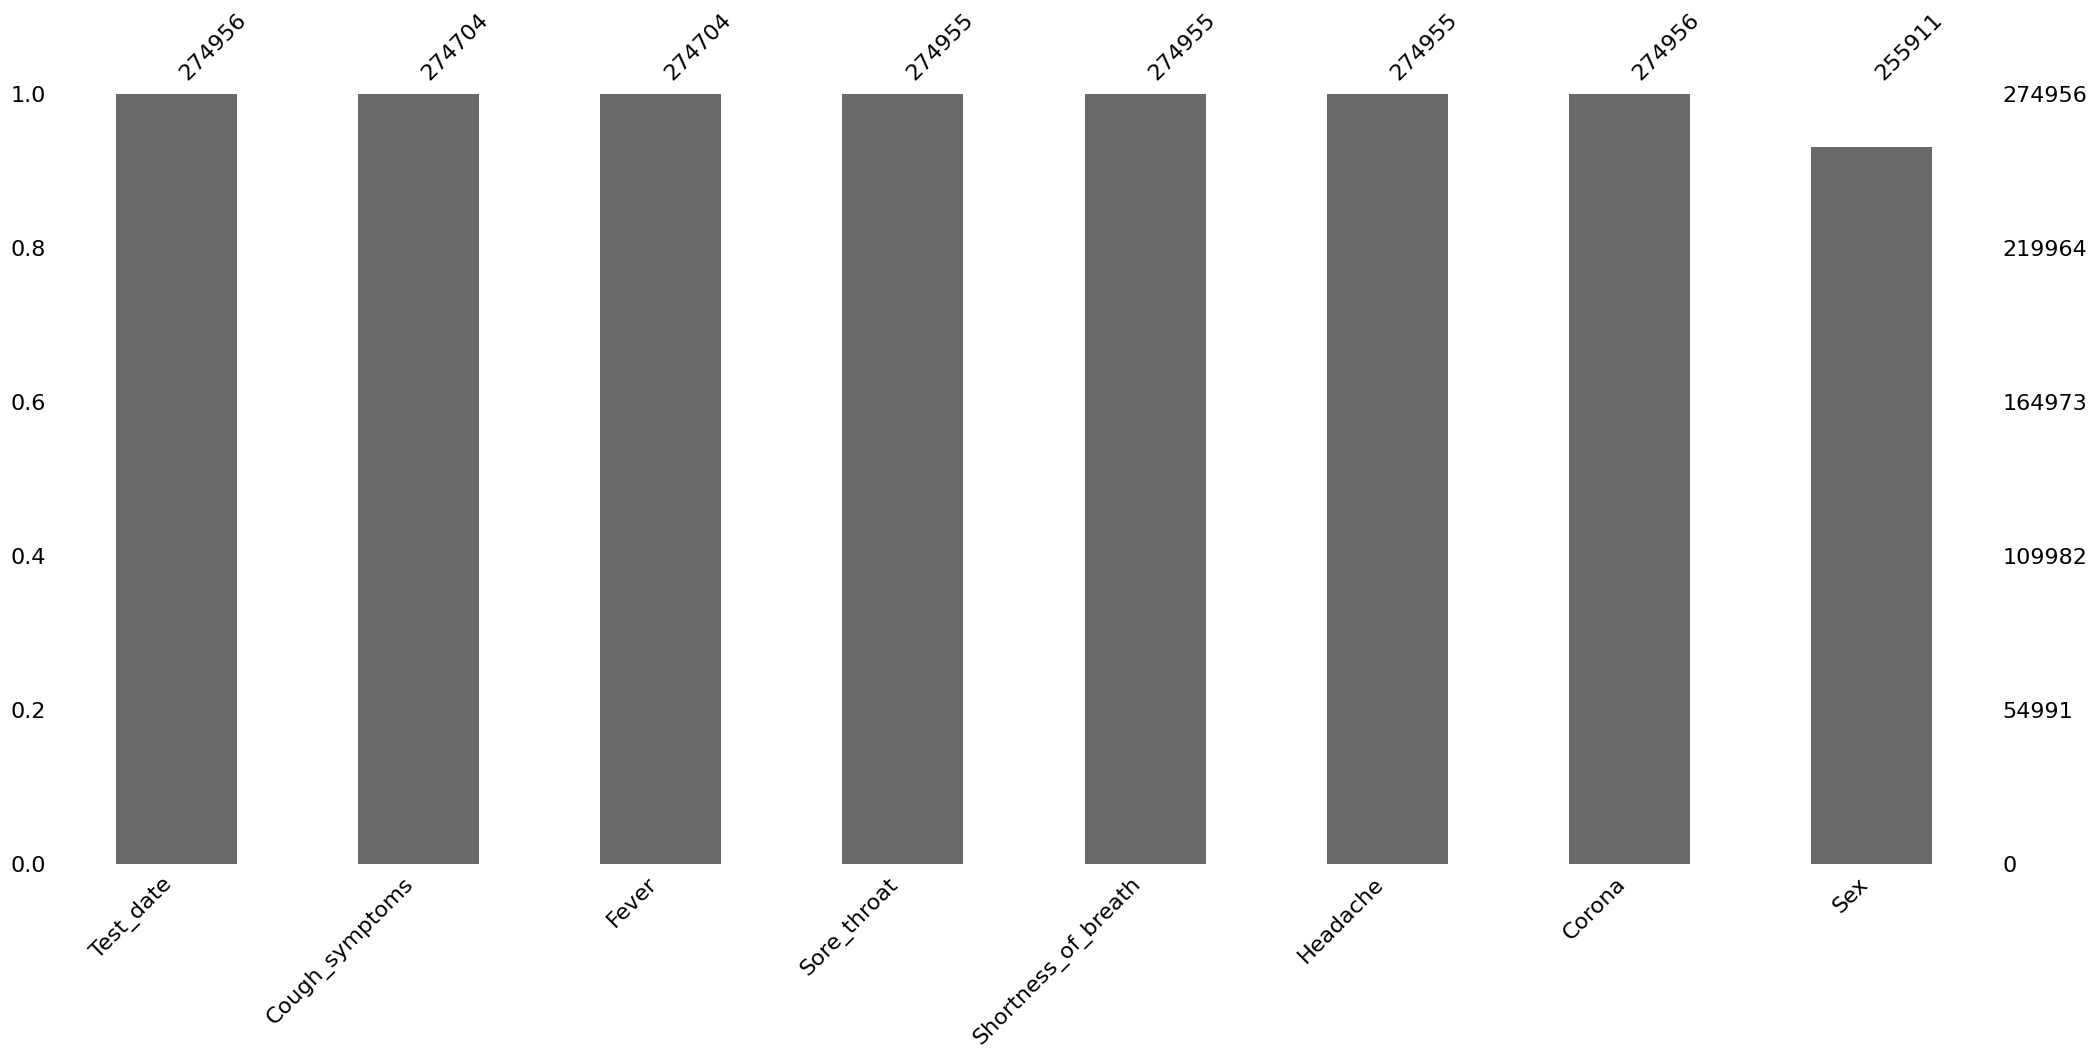

In [ ]:
# creating bar plot to see the missing values
msno.bar(Covid_data)

The above visual shows the graphical representation of missing values using the bars. There are missing values in multiple columns and 'Sex' column have more number of missing values nearly 7%.

<Axes: >

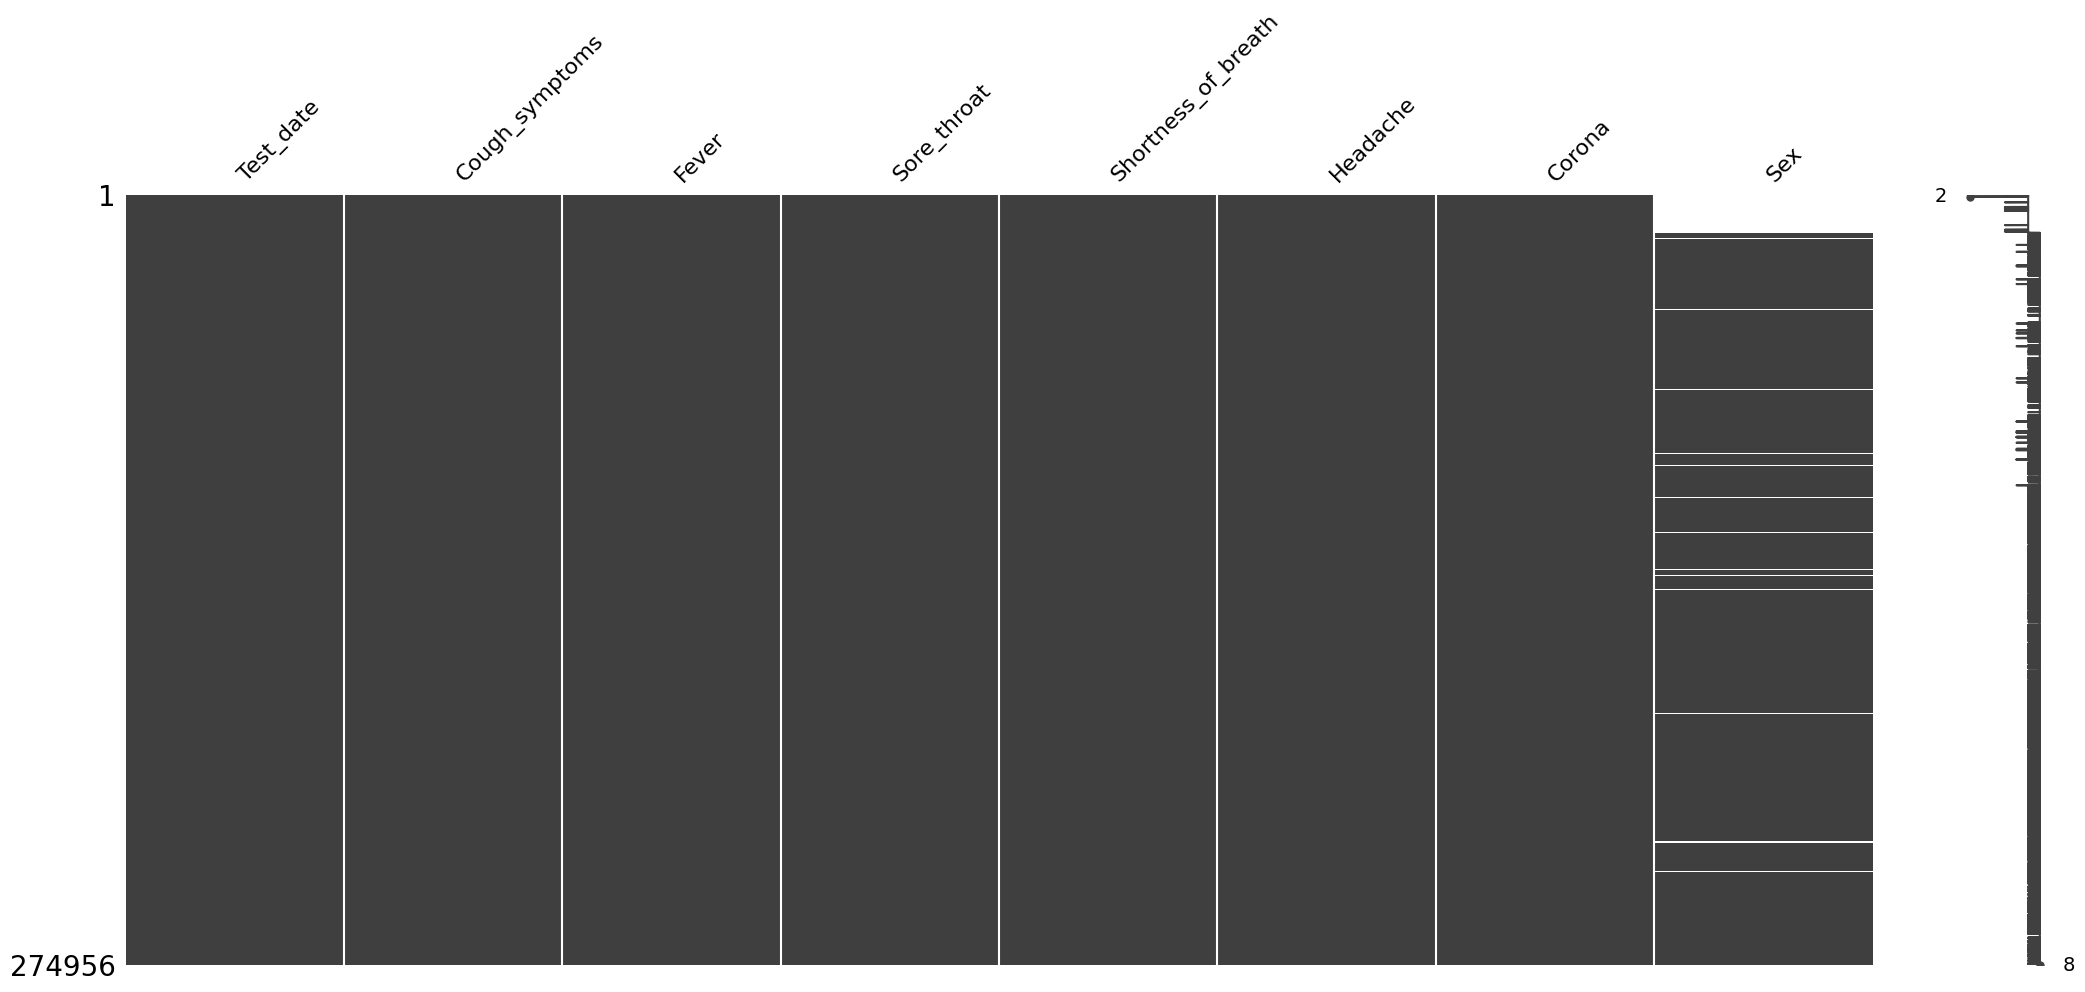

In [ ]:
# creating matrix plot to see the pattern in missing values
msno.matrix(Covid_data)

from the above visual, the white bars denote the missing values

<Axes: >

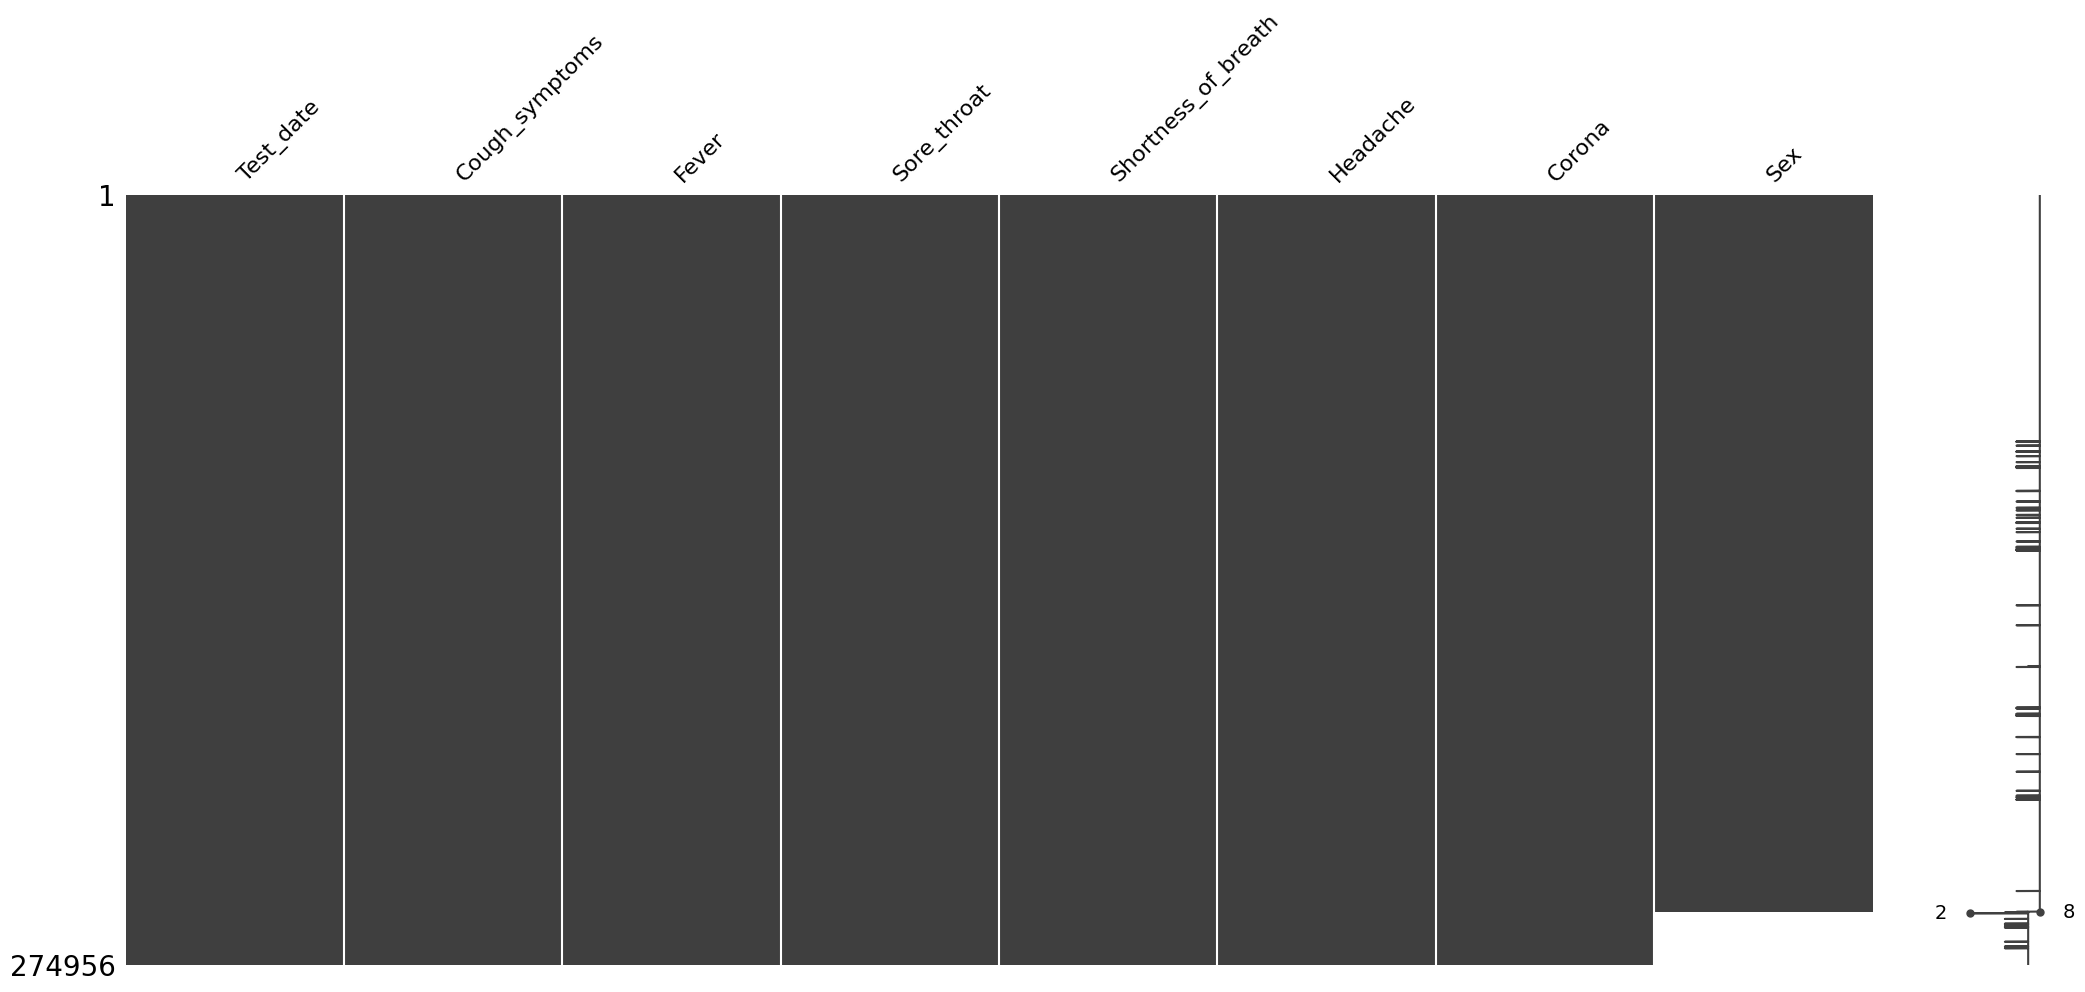

In [ ]:
sorted = Covid_data.sort_values('Sex') # sorting values based on Sex
msno.matrix(sorted)

As the Data is too large so it is difficult to find the relation ship between missing values. Lets try to observe the relationship between missing values using heatmap.

<Axes: >

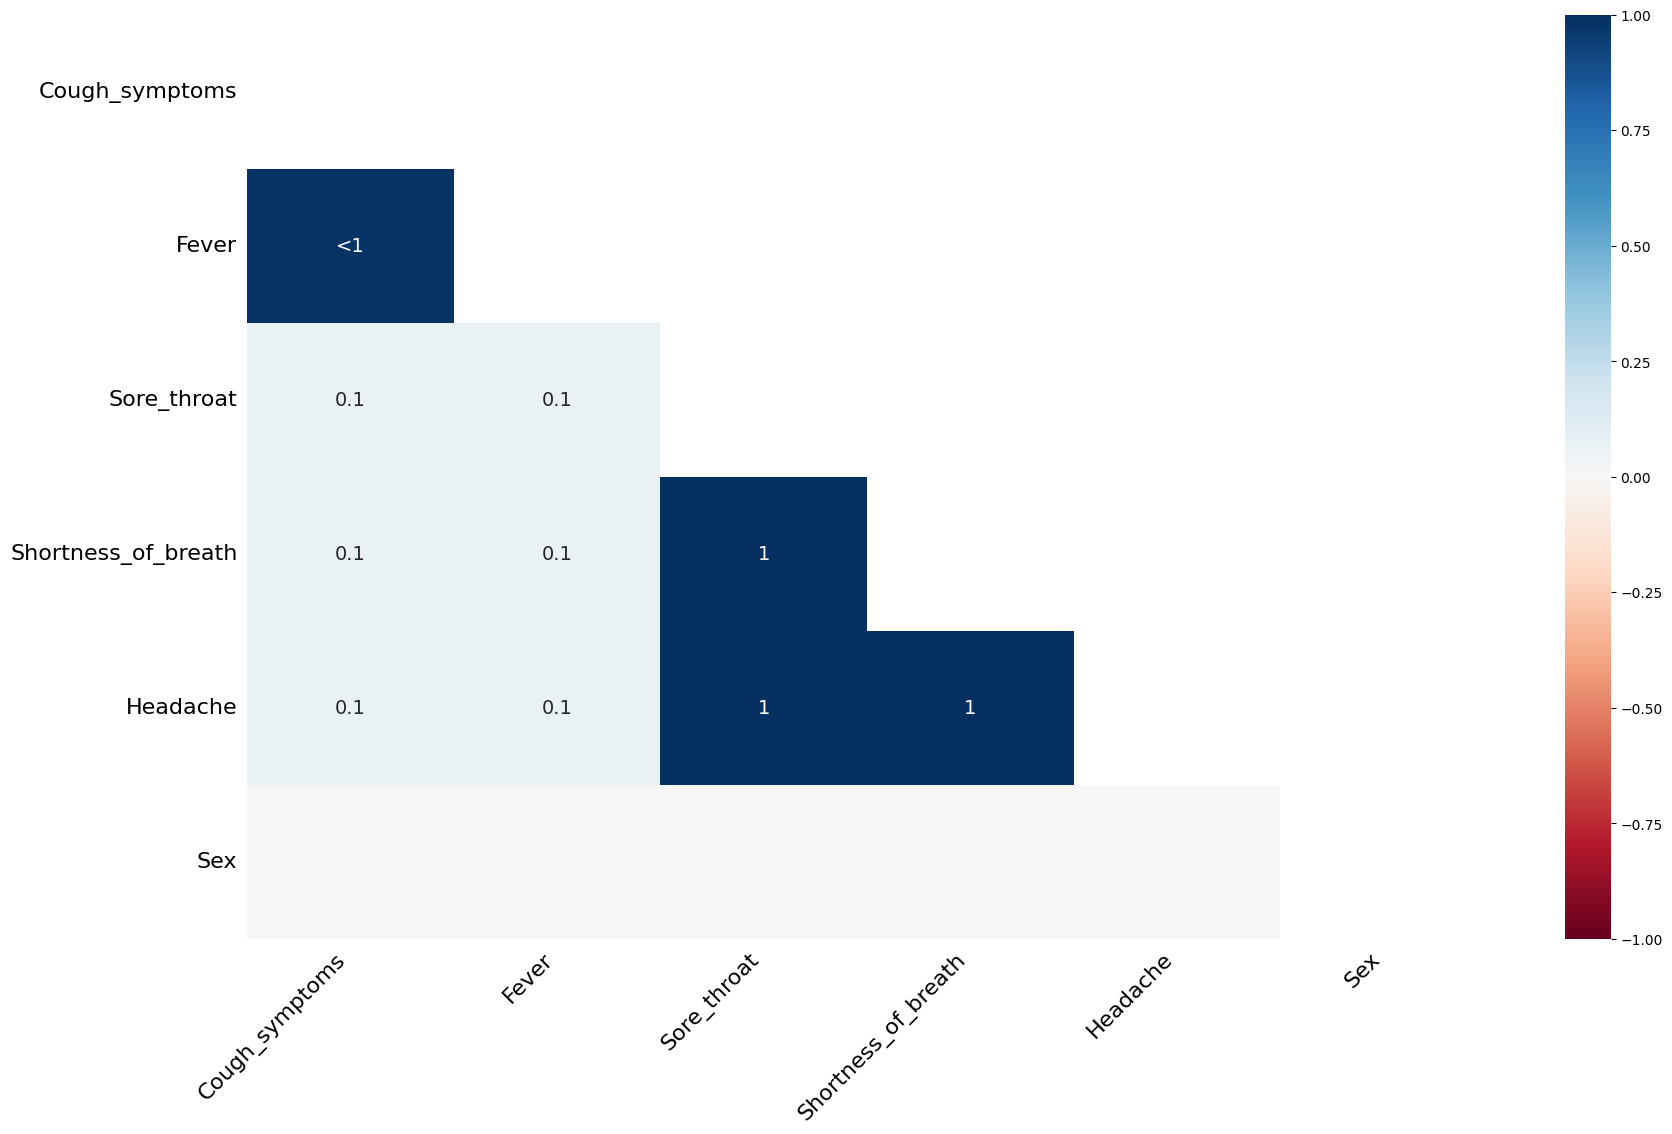

In [ ]:
msno.heatmap(Covid_data) # creating heatmap on correaltion

From the above heat map we can cearly say that Shortness_of_breath is highly correlated with 'Sore_throat' , 'Headache' is highly correlated with 'Sore_throat' and Shortness_of_breath, 'Fever' is highly correlated with 'Chough_symptoms'. 'Sex' column has no correlation with any of the features.

'Headache', 'Shortness_of_breath', 'Sore_throat' are highly correlated, whenever there is a missing value in 'Headache' there should be a missing values in  'Shortness_of_breath' and 'Sore_throat'. 'Fever' and 'Chough_symptoms' are highly correlated, whenever there is a missing value in 'Chough_symptoms' there should be a missing values in  'Fever'as well.

In [ ]:
# checking if one observation has missing values more than 1
Missing=Covid_data.isnull().sum(axis=1)
Missing=Missing[Missing>1]
Missing.value_counts()

2    241
3      9
6      1
dtype: int64

We have 6 null values in one row, 3 null values in 9 rows and 2 null values in 241 rows. So we can remove the rows that have more that 2 Null values.

In [ ]:
#removing the rows that have more than 2 null values
Covid_data.drop(Covid_data[Covid_data['Headache'].isnull()].index,axis=0, inplace=True)
Covid_data.drop(Covid_data[Covid_data['Fever'].isnull() & Covid_data['Cough_symptoms'].isnull() & Covid_data['Sex'].isnull()].index,axis=0,inplace=True)


In [ ]:
Covid_data.shape

(274946, 8)

We have removed 10 rows that have more than 2 null values. Now our date have 2,74,946 observations and 7 independent features and one label column.


In [ ]:
Covid_data.isnull().sum()

Test_date                  0
Cough_symptoms           242
Fever                    242
Sore_throat                0
Shortness_of_breath        0
Headache                   0
Corona                     0
Sex                    19035
dtype: int64

Now Our Data set have 242 null values in each of the Cough_symptoms and the Fever columns. More number of null values in Sex coulmn so we have to use imputaion teachniques to fill these null values.



In [ ]:
Covid_data['Sex'].value_counts()

female    128541
male      127370
Name: Sex, dtype: int64

In [ ]:
Covid_data['Cough_symptoms'].value_counts()

FALSE    233133
TRUE      41571
Name: Cough_symptoms, dtype: int64

In [ ]:
Covid_data['Fever'].value_counts()

FALSE    253329
TRUE      21375
Name: Fever, dtype: int64

As there are Null values present in categorical columns, to fill the Null values the best approach would be replacing Null values with most frequent values. We can see there are more number of females in 'Sex' column, more no.of FALSE in 'Cough_symptoms' and 'Fever' columns.

In [ ]:
#filling the missing values with fillna() method
x=Covid_data['Sex'].mode()[0]
Covid_data['Sex'].fillna(x,inplace=True)

y=Covid_data['Cough_symptoms'].mode()[0]
Covid_data['Cough_symptoms'].fillna(y,inplace=True)

z=Covid_data['Fever'].mode()[0]
Covid_data['Fever'].fillna(z,inplace=True)

In [ ]:
Covid_data.isnull().sum() #checking the null values

Test_date              0
Cough_symptoms         0
Fever                  0
Sore_throat            0
Shortness_of_breath    0
Headache               0
Corona                 0
Sex                    0
dtype: int64

Now our dataset is clean and doesn't have any null vales or unnecessary values. We are good to proceed with EDA.

## Data Exploration using EDA



**Distribution of Categorical data**

Univariate Analysis

In [ ]:
import matplotlib.pyplot as plt

FALSE    84.880304
TRUE     15.119696
Name: Count, dtype: float64


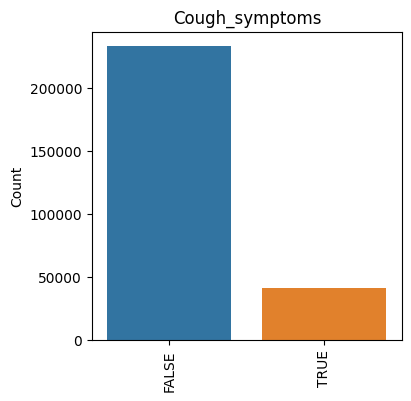

FALSE    92.225746
TRUE      7.774254
Name: Count, dtype: float64


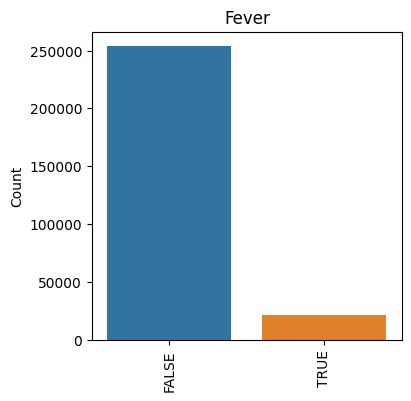

FALSE    99.312229
TRUE      0.687771
Name: Count, dtype: float64


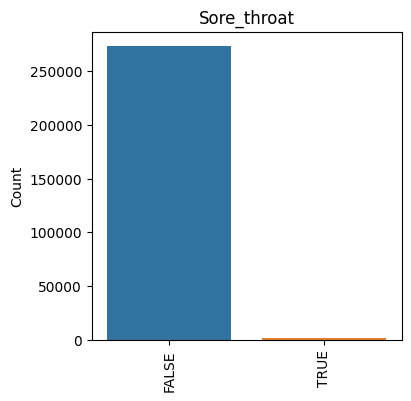

FALSE    99.43698
TRUE      0.56302
Name: Count, dtype: float64


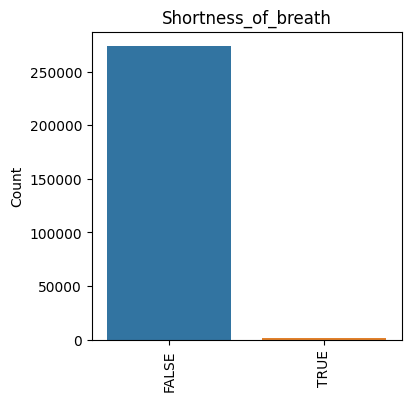

FALSE    99.133648
TRUE      0.866352
Name: Count, dtype: float64


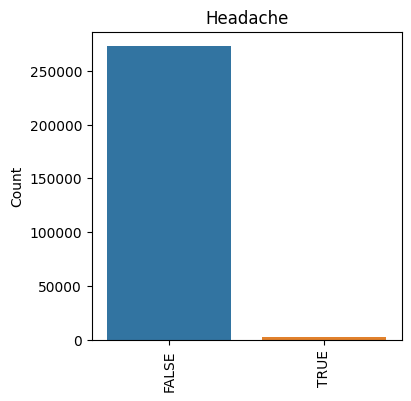

negative    94.64513
positive     5.35487
Name: Count, dtype: float64


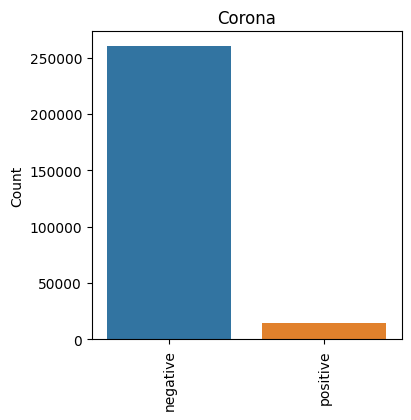

female    53.67454
male      46.32546
Name: Count, dtype: float64


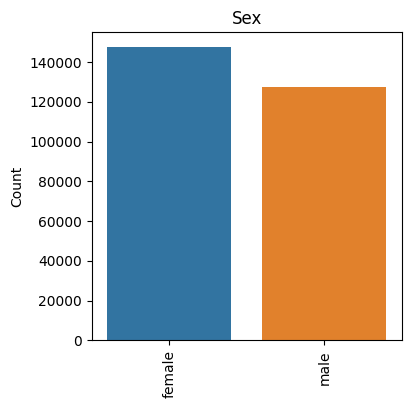

In [ ]:
# Creating a dataframe containing categorical features
df_cat = Covid_data[['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath', 'Headache','Corona','Sex']]
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    title = cat_num.name
    cat_num.name = "Count"
    print((cat_num/274946)*100)
    plt.figure(figsize=(4, 4))  # Width: 8 inches, Height: 6 inches
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

    chart.y ="Count"
    plt.title(title)
    plt.show()

**Observations**

Out of 100% only 15% people suffering from Cough_symptoms

Out of 100% only 7.8% people suffering from Fever

Very less no.of people suffering from Sore_throat only 0.68%

Very less no.of people suffering from Shortness_of_breath only 0.56%

Very less no.of people suffering from Headache only 0.86%

Only 5.35% of the people suffering from Corona Virus

There are more no.of females in our dataset 53.6%


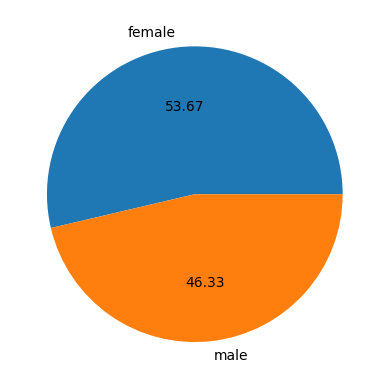

In [ ]:
# Pie chart to show the male and female distibution
plt.pie(Covid_data['Sex'].value_counts(),labels=['female','male'],autopct="%0.2f")
plt.show()

There are more no.of females who went for RT-PCR test when compared with Males

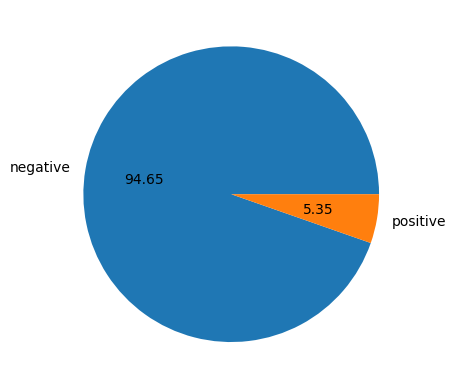

In [ ]:
# pie chart to show people affected to corona postive and negative in the test.
plt.pie(Covid_data['Corona'].value_counts(),labels=['negative','positive'],autopct="%0.2f")
plt.show()

after having RT-PCR test, only 5.35% of people are affected to Corona Virus.

**Bivariate analysis**

Sex          female       male
Corona                        
negative  95.118447  94.096726
positive   4.881553   5.903274


<Axes: xlabel='Corona'>

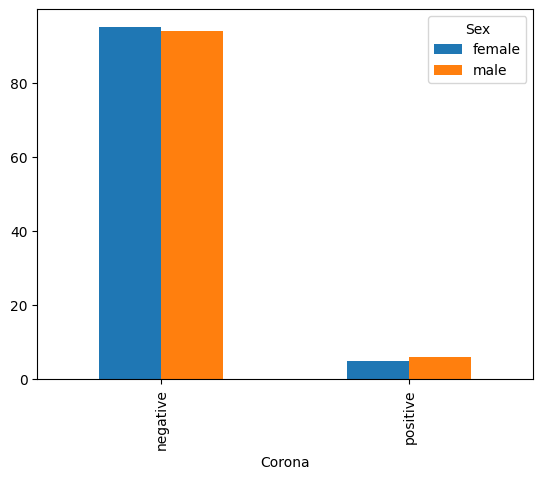

In [ ]:
# A plot to see how many males and females are affected to corona virus
Covid_data["Corona"].unique()
Corona_gender = pd.crosstab(Covid_data['Corona'], Covid_data['Sex']).apply(lambda x: x/x.sum() * 100)  # To compute a simple cross-tabulation of two (or more) factors.
print(Corona_gender)
Corona_gender.plot(kind='bar')


There are more no.of males affected to corona virus when compared with females.
And more no.of females were tested negative in the RT-PCR test when compared with males. It seems females are taking more care on their health and females are less affected to corona virus when compared with males.

Cough_symptoms     FALSE       TRUE
Corona                             
negative        96.51248  84.162036
positive         3.48752  15.837964


<Axes: xlabel='Corona'>

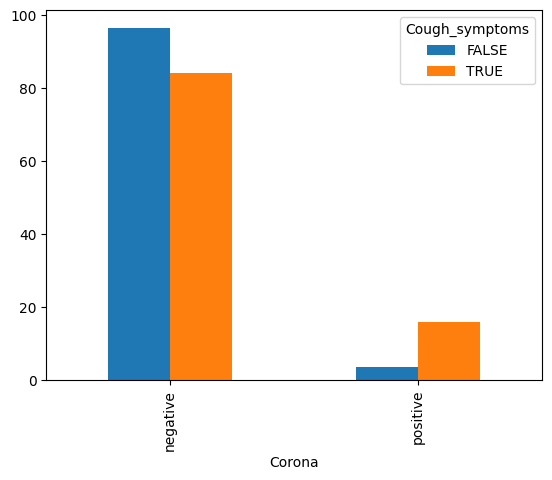

In [ ]:
# Corona VS Cough_symptoms
Covid_data["Corona"].unique()
Corona_Cough = pd.crosstab(Covid_data['Corona'], Covid_data['Cough_symptoms']).apply(lambda x: x/x.sum() * 100)  # To compute a simple cross-tabulation of two (or more) factors.
print(Corona_Cough)
Corona_Cough.plot(kind='bar')


If the person is suffering from Cough symptoms there is a 15% possibility that he
might have corona virus




Fever         FALSE       TRUE
Corona                        
negative  96.386022  73.992982
positive   3.613978  26.007018


<Axes: xlabel='Corona'>

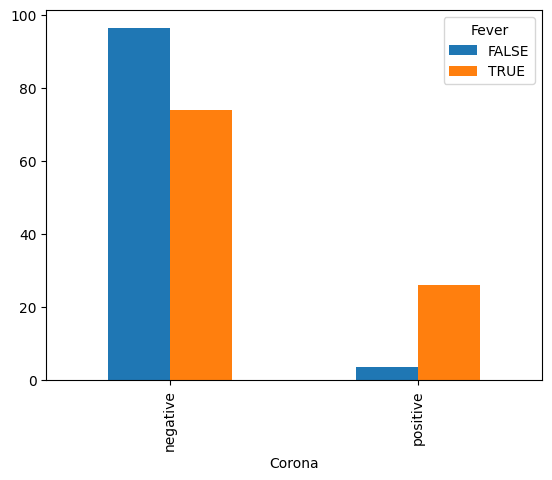

In [ ]:
#Corona vs Fever
Covid_data["Corona"].unique()
Corona_Fever = pd.crosstab(Covid_data['Corona'], Covid_data['Fever']).apply(lambda x: x/x.sum() * 100)  # To compute a simple cross-tabulation of two (or more) factors.
print(Corona_Fever)
Corona_Fever.plot(kind='bar')


If the person is suffering from Fever there is a 26% possibility that he
might have corona virus


Sex               female       male
Cough_symptoms                     
FALSE           85.96723  83.620947
TRUE            14.03277  16.379053


<Axes: xlabel='Cough_symptoms'>

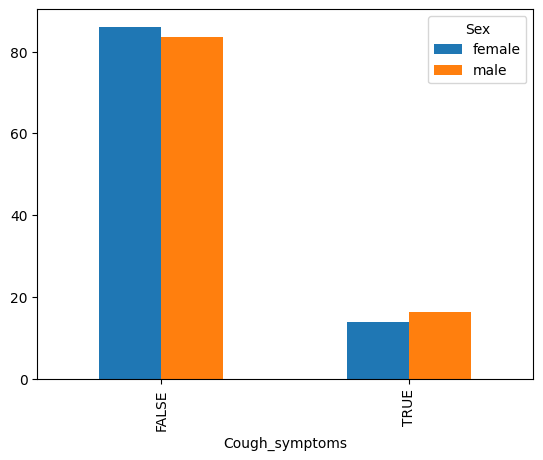

In [ ]:
# Cough_symptoms VS Sex
Covid_data["Cough_symptoms"].unique()
Corona_Cough = pd.crosstab(Covid_data['Cough_symptoms'], Covid_data['Sex']).apply(lambda x: x/x.sum() * 100)  # To compute a simple cross-tabulation of two (or more) factors.
print(Corona_Cough)
Corona_Cough.plot(kind='bar')

slighty more Males were affected to cough_symtoms than females.

Sore_throat      FALSE       TRUE
Corona                           
negative     95.166908  19.301957
positive      4.833092  80.698043


<Axes: xlabel='Corona'>

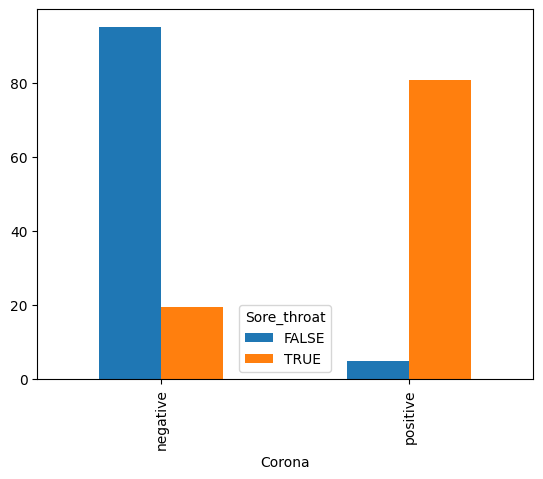

In [ ]:
#Corona vs Sore_throat
Covid_data["Corona"].unique()
Corona_Sore_throat = pd.crosstab(Covid_data['Corona'], Covid_data['Sore_throat']).apply(lambda x: x/x.sum() * 100)  # To compute a simple cross-tabulation of two (or more) factors.
print(Corona_Sore_throat)
Corona_Sore_throat.plot(kind='bar')


The person who is affected to Sore_throat, there is a 80% chance that the person is affected to Corona virus. insights


Shortness_of_breath      FALSE       TRUE
Corona                                   
negative             95.040564  24.806202
positive              4.959436  75.193798


<Axes: xlabel='Corona'>

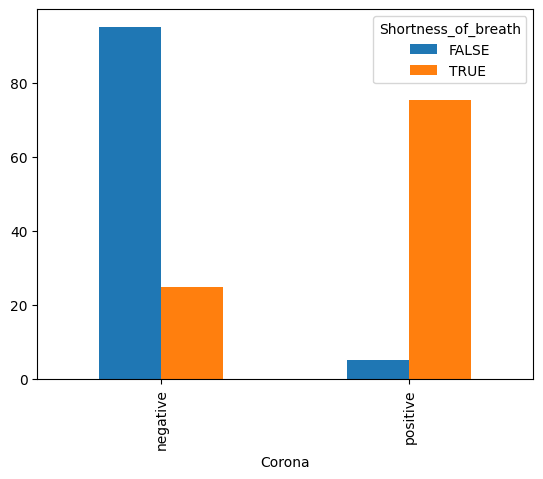

In [ ]:
#Corona vs Shortness_of_breath
Covid_data["Corona"].unique()
Corona_Shortness_of_breath = pd.crosstab(Covid_data['Corona'], Covid_data['Shortness_of_breath']).apply(lambda x: x/x.sum() * 100)  # To compute a simple cross-tabulation of two (or more) factors.
print(Corona_Shortness_of_breath)
Corona_Shortness_of_breath.plot(kind='bar')


The person who is affected to Shortness_of_breath, there is a 75% chance that
the person is affected to Corona virus. insights


Headache      FALSE       TRUE
Corona                        
negative  95.418324   6.171285
positive   4.581676  93.828715


<Axes: xlabel='Corona'>

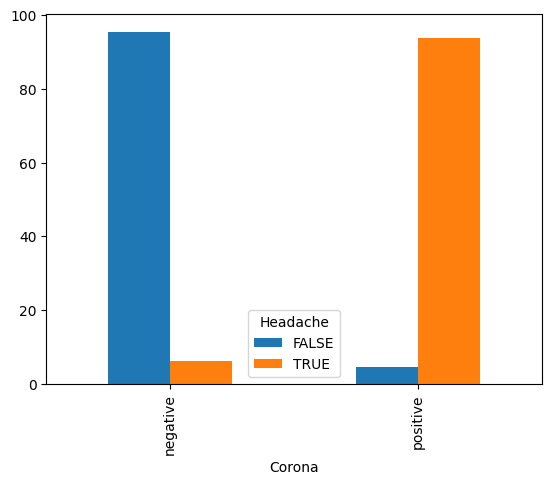

In [ ]:
#Corona vs Headache
Covid_data["Corona"].unique()
Corona_Headache = pd.crosstab(Covid_data['Corona'], Covid_data['Headache']).apply(lambda x: x/x.sum() * 100)  # To compute a simple cross-tabulation of two (or more) factors.
print(Corona_Headache)
Corona_Headache.plot(kind='bar')


The person who is affected to Headache, there is a 93.8% chance that the person is affected to Corona virus. insights


Fever               FALSE       TRUE
Cough_symptoms                      
FALSE           89.600546  28.884211
TRUE            10.399454  71.115789


<Axes: xlabel='Cough_symptoms'>

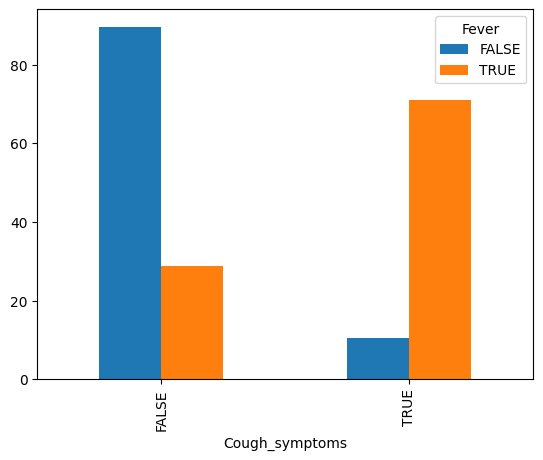

In [ ]:
# Cough_symptoms VS Fever
Covid_data["Cough_symptoms"].unique()
Corona_Cough = pd.crosstab(Covid_data['Cough_symptoms'], Covid_data['Fever']).apply(lambda x: x/x.sum() * 100)  # To compute a simple cross-tabulation of two (or more) factors.
print(Corona_Cough)
Corona_Cough.plot(kind='bar')

If a person is suffering from Cough Symptoms there is more possibility that he may suffer from fever.

Sore_throat      FALSE       TRUE
Sex                              
female       53.605318  63.670016
male         46.394682  36.329984


<Axes: xlabel='Sex'>

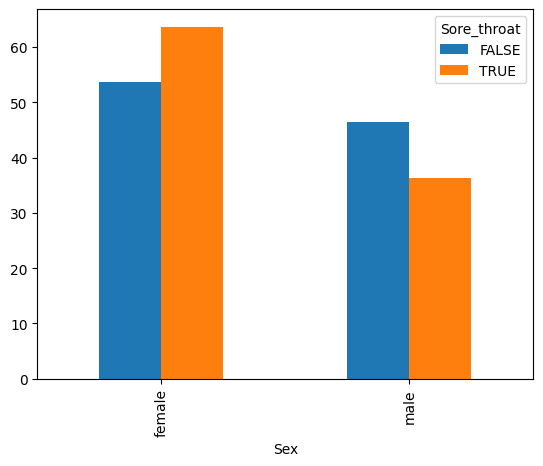

In [ ]:
#Sore_throat VS Sex
Covid_data["Sore_throat"].unique()
Corona_Sore_throat = pd.crosstab(Covid_data['Sex'], Covid_data['Sore_throat']).apply(lambda x: x/x.sum() * 100)  # To compute a simple cross-tabulation of two (or more) factors.
print(Corona_Sore_throat)
Corona_Sore_throat.plot(kind='bar')


More no.of females are affected to Sore Throat comapare to males


Shortness_of_breath      FALSE       TRUE
Sex                                      
female               53.622192  62.919897
male                 46.377808  37.080103


<Axes: xlabel='Sex'>

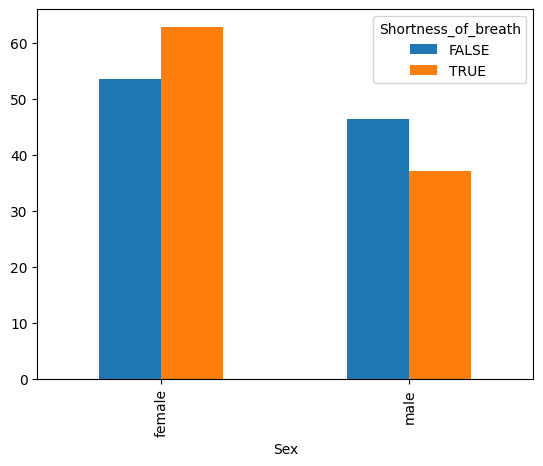

In [ ]:
#Shortness_of_breath VS Sex
Covid_data["Shortness_of_breath"].unique()
Corona_Shortness_of_breath = pd.crosstab(Covid_data['Sex'], Covid_data['Shortness_of_breath']).apply(lambda x: x/x.sum() * 100)  # To compute a simple cross-tabulation of two (or more) factors.
print(Corona_Shortness_of_breath)
Corona_Shortness_of_breath.plot(kind='bar')


More no.of females are affected to Shortness_of_breath comapare to males


Headache     FALSE      TRUE
Sex                         
female    53.66336  54.95382
male      46.33664  45.04618


<Axes: xlabel='Sex'>

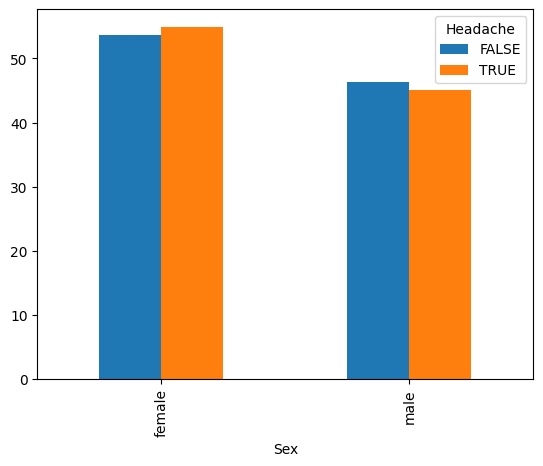

In [ ]:
#Headache VS Sex
Covid_data["Shortness_of_breath"].unique()
Corona_Headache = pd.crosstab(Covid_data['Sex'], Covid_data['Headache']).apply(lambda x: x/x.sum() * 100)  # To compute a simple cross-tabulation of two (or more) factors.
print(Corona_Headache)
Corona_Headache.plot(kind='bar')


More no.of females are affected to Headache comapare to males


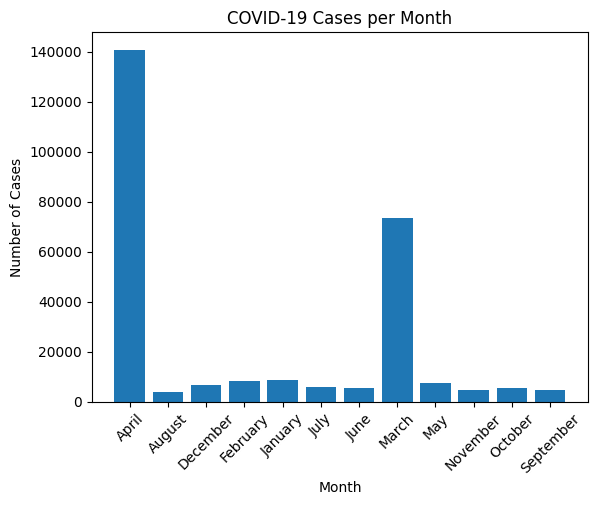

In [ ]:
# a plot to see the distribution of corona cases with month
cases_per_month = Covid_data.groupby(Covid_data['Test_date'].dt.month_name())['Corona'].count()
plt.bar(cases_per_month.index, cases_per_month.values)
plt.xlabel('Month')
plt.ylabel('Number of Cases')
plt.title('COVID-19 Cases per Month')
plt.xticks(rotation=45)
plt.show()

From the above plot it is clear that more no.of people have taken covid test in the April month followed by March month.

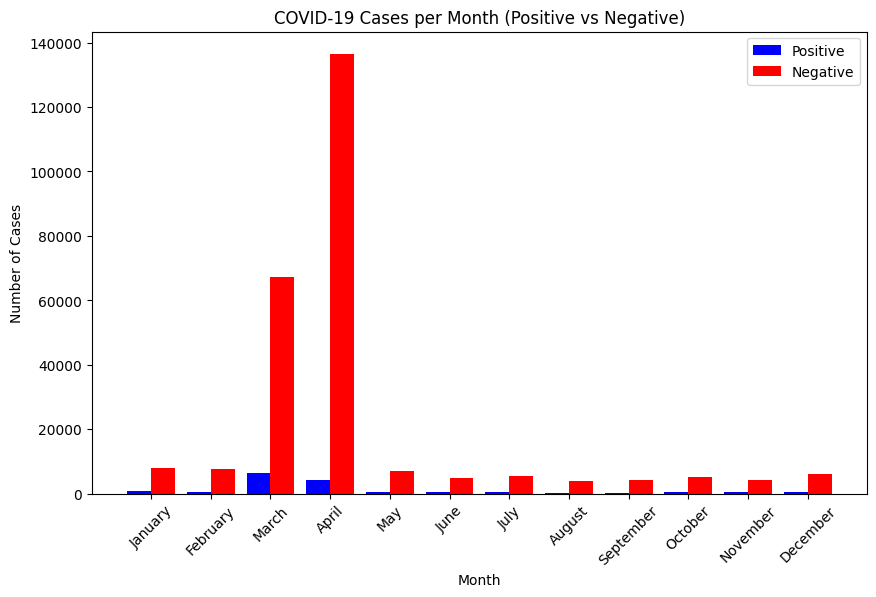

In [ ]:
# a plot to see the distribution of corona postivie and negative cases with month

# Group the data by month and calculate the sum of positive and negative cases
cases_per_month = Covid_data.groupby(Covid_data['Test_date'].dt.month_name())['Corona'].value_counts().unstack().fillna(0)

# Define the desired order of the months
desired_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Set the index to the defined order of the months
cases_per_month = cases_per_month.reindex(desired_order)
# Get the list of months
months = cases_per_month.index
# Get the number of cases for positive and negative
positive_cases = cases_per_month['positive']
negative_cases = cases_per_month['negative']
# Set the positions of the bars on the x-axis
bar_width = 0.4
r1 = range(len(months))
r2 = [x + bar_width for x in r1]

plt.figure(figsize=(10, 6))  #adjusting the width and height as needed

# Plot the bars
plt.bar(r1, positive_cases, color='blue', width=bar_width, label='Positive')
plt.bar(r2, negative_cases, color='red', width=bar_width, label='Negative')

# Customize the plot
plt.xlabel('Month')
plt.ylabel('Number of Cases')
plt.title('COVID-19 Cases per Month (Positive vs Negative)')
plt.xticks([r + bar_width/2 for r in range(len(months))], months, rotation=45)
plt.legend()

# Display the plot
plt.show()


from the above plot we can see the distribution of corona postivie and negative cases with month. In the month of March and April there are more no.of people have taken corona test, but most of them have corona negative.

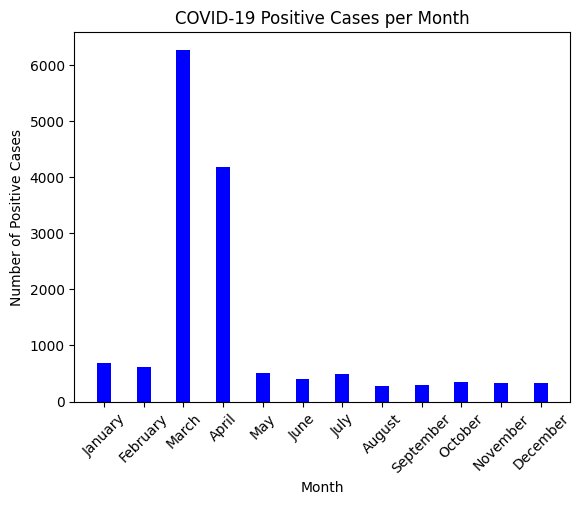

In [ ]:

#a plot to see the distribution of corona postivie cases with month
# Group the data by month and calculate the sum of positive cases
cases_per_month = Covid_data[Covid_data['Corona'] == 'positive'].groupby(Covid_data['Test_date'].dt.month_name())['Corona'].count()

# Define the desired order of the months
desired_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Set the index to the defined order of the months
cases_per_month = cases_per_month.reindex(desired_order)

# Get the list of months
months = cases_per_month.index

# Get the number of positive cases
positive_cases = cases_per_month.values

# Set the positions of the bars on the x-axis
bar_width = 0.35
r = range(len(months))

# Plot the bars
plt.bar(r, positive_cases, color='blue', width=bar_width)

# Customize the plot
plt.xlabel('Month')
plt.ylabel('Number of Positive Cases')
plt.title('COVID-19 Positive Cases per Month')
plt.xticks([i for i in r], months, rotation=45)

# Display the plot
plt.show()

From the above plot it is clear that more no.of positive cases reported in March month followed by April month. During these two months the corona virus spread was more.

**Summary**:

More no.of people suffering from Cough(15% of people) when compared with other symptoms.

There were more no.of females who have taken RT-PCR test when compared with male.

Eventhough less males had taken RT-PCR test, but they are affected more to virus than females.

Out of 100% people who had taken the RT-PCR test only 5.35% of people were affected to Corona Virus.

The person who is affected to Sore_throat, there is a 80% chance that the person is affected to Corona virus.

The person who is affected to Shortness_of_breath, there is a 75% chance that the person is affected to Corona virus.

The person who is affected to Headache, there is a 93.8% chance that the person is affected to Corona virus.

If a person is suffering from Cough Symptoms there is more possibility that he may suffer from fever.

More no.of people have taken covid test in the April month followed by March month.


**Insights:**

There are slightly more no.of males affected to corona virus when compared with females.And more no.of females were tested negative in the RT-PCR test when compared with males. It seems females are taking more care on their health and females are slightly less affected to corona virus when compared with males.

If a person suffering from Sore throat or Shortness of breath or Headache there is high chances that the person is affected to Corono Virus. Surprisingly more females are affected to these symptoms.

Even though the person is suffering from fever or Cough there might be less chances that the person is affected to Corona Virus.

If person went to for a RT-PCR test there is only 5.35% chances that he might affected to the Virus.

More no.of positive cases reported in March month followed by April month. During these two months the corona virus spread was more.

In [ ]:
# label encoding for the categorical variable
from sklearn.preprocessing import LabelEncoder

for col in ["Cough_symptoms", "Fever", "Sore_throat", "Shortness_of_breath","Headache","Corona","Sex"]:
    Covid_data[col] = LabelEncoder().fit_transform(Covid_data[col])

In [ ]:
Covid_data.head() # seeing top 5 rows

,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Sex
0,2020-11-03,1,0,1,0,0,0,0
1,2020-11-03,0,1,0,0,0,1,0
2,2020-11-03,0,1,0,0,0,1,0
3,2020-11-03,1,0,0,0,0,0,0
4,2020-11-03,1,0,0,0,0,0,0


In [ ]:
# Examine multicollinearity using VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# the independent variables set
X_vif = Covid_data.drop(['Test_date','Corona'], axis=1)
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X_vif.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i)
                          for i in range(len(X_vif.columns))]

print(vif_data)

               feature       VIF
0       Cough_symptoms  1.427820
1                Fever  1.392719
2          Sore_throat  1.153495
3  Shortness_of_breath  1.079226
4             Headache  1.170371
5                  Sex  1.096929


We don't have any column with VIF value with more than 5, and our data doesn't have any multicollinearity.


In [ ]:
#splitting dataframe into training and testing sets using Test_date coulmn

# Defining the date to split the data frame
split_date = pd.to_datetime('2020-04-15')


# Split the data frame into two based on the split date
df1 = Covid_data[Covid_data['Test_date'] <= split_date]
df2_test = Covid_data[Covid_data['Test_date'] > split_date]


In [ ]:
#considering 11th March till 15th April as a training and validation set. From 16th April till 30th April as a test set
X_train=df1.drop(['Test_date',"Corona"], axis=1)
X_test=df2_test.drop(['Test_date',"Corona"], axis=1)
y_train = df1['Corona']
y_test=df2_test['Corona']


In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(116785, 6)
(116785,)
(158161, 6)
(158161,)


#Feature Scaling

In [ ]:
# performing Standardscaler to scale the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_train

array([[-0.40275708, -0.29353009, -0.11114241, -0.10334054, -0.12825678,
        -0.87981029],
       [-0.40275708, -0.29353009, -0.11114241, -0.10334054, -0.12825678,
        -0.87981029],
       [-0.40275708, -0.29353009, -0.11114241, -0.10334054, -0.12825678,
        -0.87981029],
       ...,
       [-0.40275708, -0.29353009, -0.11114241, -0.10334054, -0.12825678,
        -0.87981029],
       [-0.40275708, -0.29353009, -0.11114241, -0.10334054, -0.12825678,
         1.13660867],
       [-0.40275708, -0.29353009, -0.11114241, -0.10334054, -0.12825678,
         1.13660867]])

In [ ]:
X_test=sc.transform(X_test)
X_test

array([[ 2.48288621, -0.29353009,  8.99746553, -0.10334054, -0.12825678,
        -0.87981029],
       [-0.40275708,  3.40680577, -0.11114241, -0.10334054, -0.12825678,
        -0.87981029],
       [-0.40275708,  3.40680577, -0.11114241, -0.10334054, -0.12825678,
        -0.87981029],
       ...,
       [-0.40275708, -0.29353009, -0.11114241, -0.10334054, -0.12825678,
         1.13660867],
       [-0.40275708, -0.29353009, -0.11114241, -0.10334054, -0.12825678,
         1.13660867],
       [-0.40275708, -0.29353009, -0.11114241, -0.10334054, -0.12825678,
        -0.87981029]])

# Recursive Feature Elimination

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=10)
rfe = rfe.fit(X, y)
print(X.columns)
print(rfe.support_)
rfe.ranking_


Index(['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath',
       'Headache', 'Sex'],
      dtype='object')
[ True  True  True  True  True  True]


array([1, 1, 1, 1, 1, 1])

1 represents the top most impactful features to be used for the model training


From VIF and recursive feature elimination techniques, we can conclude that our data doesn't have any multicolleniarity and we are good to give the data as a input to different models.

In [ ]:
#importing libraries for model building
from sklearn.metrics import accuracy_score, log_loss
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
import xgboost
import math
from sklearn import metrics
from sklearn.metrics import accuracy_score , classification_report, ConfusionMatrixDisplay,precision_score,recall_score, f1_score,roc_auc_score,roc_curve

In [ ]:
models={
    "Logisitic Regression" :LogisticRegression(max_iter=20000),
    "Decision Tree" :DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier(),
    "Support Vector Machine": svm.SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=3)
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train.values.ravel()) # Train Model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred =  model.predict(X_test)

  # Performance of Test set
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    model_test_precision = precision_score(y_test, y_test_pred , average='weighted')
    model_test_recall  = recall_score(y_test, y_test_pred,average='weighted')

  # Performance of Training set
    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_f1 = f1_score(y_train, y_train_pred, average= 'weighted')
    model_train_precision = precision_score(y_train, y_train_pred,average='weighted')
    model_train_recall = recall_score(y_train, y_train_pred,average='weighted')

    print(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Accuracy: {:.2f}".format(model_train_accuracy))
    print('- F1 score: {:2f}'.format(model_train_f1))
    print('- Precision: {:2f}'.format(model_train_precision))
    print('- Recall: {:2f}'.format(model_train_recall))

    print('----------------------------------')

    print('Model performance for Test set')
    print('- Accuracy: {:.2f}'.format(model_test_accuracy) )
    print('- Fl score: {:.2f}'.format(model_test_f1))
    print('- Precision: {:.2f}'.format(model_test_precision))
    print('- Recall: {:.2f}'.format(model_test_recall))


    print('='*30)
    print('\n')

Logisitic Regression
Model performance for Training set
- Accuracy: 0.94
- F1 score: 0.928970
- Precision: 0.939622
- Recall: 0.942518
----------------------------------
Model performance for Test set
- Accuracy: 0.97
- Fl score: 0.96
- Precision: 0.96
- Recall: 0.97


Decision Tree
Model performance for Training set
- Accuracy: 0.94
- F1 score: 0.931174
- Precision: 0.940488
- Recall: 0.943683
----------------------------------
Model performance for Test set
- Accuracy: 0.97
- Fl score: 0.96
- Precision: 0.96
- Recall: 0.97


Random Forest
Model performance for Training set
- Accuracy: 0.94
- F1 score: 0.931174
- Precision: 0.940488
- Recall: 0.943683
----------------------------------
Model performance for Test set
- Accuracy: 0.97
- Fl score: 0.96
- Precision: 0.96
- Recall: 0.97


Support Vector Machine
Model performance for Training set
- Accuracy: 0.94
- F1 score: 0.931174
- Precision: 0.940488
- Recall: 0.943683
----------------------------------
Model performance for Test set
-

From the above results it is clear that all the models gave almost same results, but Decision Tree, Random Forest and Support Vector Machine gave the better reults.

In [ ]:
# based on the question again splitting the data from 11th March till 15th April into training and testing in the ratio of 4:1
from sklearn.model_selection import train_test_split
X=df1.drop(['Test_date',"Corona"], axis=1)
y = df1['Corona']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(93428, 6)
(93428,)
(23357, 6)
(23357,)


# Feature Scaling

In [ ]:
# performing Standardscaler to scale the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_train

array([[-0.40194905, -0.29315997, -0.11104367, -0.10412063, -0.12903059,
         1.13798979],
       [-0.40194905, -0.29315997, -0.11104367, -0.10412063, -0.12903059,
         1.13798979],
       [ 2.4878775 , -0.29315997, -0.11104367, -0.10412063, -0.12903059,
         1.13798979],
       ...,
       [-0.40194905,  3.41110694, -0.11104367, -0.10412063, -0.12903059,
        -0.87874251],
       [-0.40194905, -0.29315997, -0.11104367,  9.60424474, -0.12903059,
        -0.87874251],
       [-0.40194905, -0.29315997, -0.11104367, -0.10412063, -0.12903059,
         1.13798979]])

In [ ]:
X_test=sc.transform(X_test)
X_test

array([[-0.40194905, -0.29315997, -0.11104367, -0.10412063, -0.12903059,
        -0.87874251],
       [ 2.4878775 , -0.29315997, -0.11104367, -0.10412063, -0.12903059,
        -0.87874251],
       [-0.40194905, -0.29315997, -0.11104367, -0.10412063, -0.12903059,
        -0.87874251],
       ...,
       [-0.40194905, -0.29315997, -0.11104367, -0.10412063, -0.12903059,
         1.13798979],
       [-0.40194905, -0.29315997, -0.11104367, -0.10412063, -0.12903059,
         1.13798979],
       [-0.40194905, -0.29315997, -0.11104367, -0.10412063, -0.12903059,
        -0.87874251]])

In [ ]:
models={
    "Logisitic Regression" :LogisticRegression(max_iter=20000),
    "Decision Tree" :DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier(),
    "Support Vector Machine": svm.SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=3)
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train.values.ravel()) # Train Model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred =  model.predict(X_test)

  # Performance of Test set
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    model_test_precision = precision_score(y_test, y_test_pred , average='weighted')
    model_test_recall  = recall_score(y_test, y_test_pred,average='weighted')

  # Performance of Training set
    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_f1 = f1_score(y_train, y_train_pred, average= 'weighted')
    model_train_precision = precision_score(y_train, y_train_pred,average='weighted')
    model_train_recall = recall_score(y_train, y_train_pred,average='weighted')

    print(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Accuracy: {:.2f}".format(model_train_accuracy))
    print('- F1 score: {:2f}'.format(model_train_f1))
    print('- Precision: {:2f}'.format(model_train_precision))
    print('- Recall: {:2f}'.format(model_train_recall))

    print('----------------------------------')

    print('Model performance for Test set')
    print('- Accuracy: {:.2f}'.format(model_test_accuracy) )
    print('- Fl score: {:.2f}'.format(model_test_f1))
    print('- Precision: {:.2f}'.format(model_test_precision))
    print('- Recall: {:.2f}'.format(model_test_recall))


    print('='*30)
    print('\n')

Logisitic Regression
Model performance for Training set
- Accuracy: 0.94
- F1 score: 0.929466
- Precision: 0.939967
- Recall: 0.942865
----------------------------------
Model performance for Test set
- Accuracy: 0.94
- Fl score: 0.93
- Precision: 0.94
- Recall: 0.94


Decision Tree
Model performance for Training set
- Accuracy: 0.94
- F1 score: 0.934868
- Precision: 0.937495
- Recall: 0.944042
----------------------------------
Model performance for Test set
- Accuracy: 0.94
- Fl score: 0.93
- Precision: 0.93
- Recall: 0.94


Random Forest
Model performance for Training set
- Accuracy: 0.94
- F1 score: 0.934868
- Precision: 0.937495
- Recall: 0.944042
----------------------------------
Model performance for Test set
- Accuracy: 0.94
- Fl score: 0.93
- Precision: 0.93
- Recall: 0.94


Support Vector Machine
Model performance for Training set
- Accuracy: 0.94
- F1 score: 0.934859
- Precision: 0.937477
- Recall: 0.944032
----------------------------------
Model performance for Test set
-

From the above results it is clear that all the models gave almost same results, but Decision Tree, Random Forest and Support Vector Machine gave the better reults.

#Conclusion

We have trained different models on our dataset and determined all models giving almost same results but Decision Tree, Random Forest and Support Vector Machine models gave better results. Therefore, we could choose any one of the 3 models to classify whether or not person have Corona positive or negative.